In [1]:
import os
import pandas as pd

# Obtener todos los archivos .csv del directorio actual
xlsx_files = [f for f in os.listdir() if f.endswith('.xlsx')]

In [2]:
column_dict = {}

for file in xlsx_files:
    df = pd.read_excel(file)
    column_dict[file] = df.columns.tolist()

# Encontrar la longitud máxima de columnas entre todos los archivos
max_len = max(len(cols) for cols in column_dict.values())

# Rellenar las listas con None para que todas tengan la misma longitud
for key in column_dict:
    column_dict[key] += [None] * (max_len - len(column_dict[key]))

# Convertir el diccionario a DataFrame (con columnas de distinta longitud se rellenará con NaN)
describe = pd.DataFrame.from_dict(column_dict, orient='columns')

In [3]:
cantidad_sensores= sum(len(cols) for cols in column_dict.values())

In [4]:
column_dict = {}

for file in xlsx_files:
    df = pd.read_excel(file)
    column_dict[file] = df.columns.tolist()

In [5]:
## Calculo del numero de sensores en 91 barcos

sensores = 0  # Inicializar la variable sensores

# Asumiendo que 'xlsx_files' es una lista de nombres de archivo XLSX
for cont in xlsx_files:
    # Asumiendo que 'column_dict' es un diccionario donde las claves son los nombres de archivo
    # y los valores son listas o diccionarios representando las columnas.
    # 'len(column_dict[cont])' obtendría el número de columnas (sensores) para ese archivo.
    num_sensores_archivo = len(column_dict[cont])
    sensores += num_sensores_archivo  # Sumar el número de sensores del archivo actual
    sensores += num_sensores_archivo  # Volver a sumar el número de sensores del archivo actual

# El valor final de la variable 'sensores'
print(sensores)

9902


In [6]:
# Grabar a excel

describe.to_excel("resumen_columnas.xlsx", index=False)

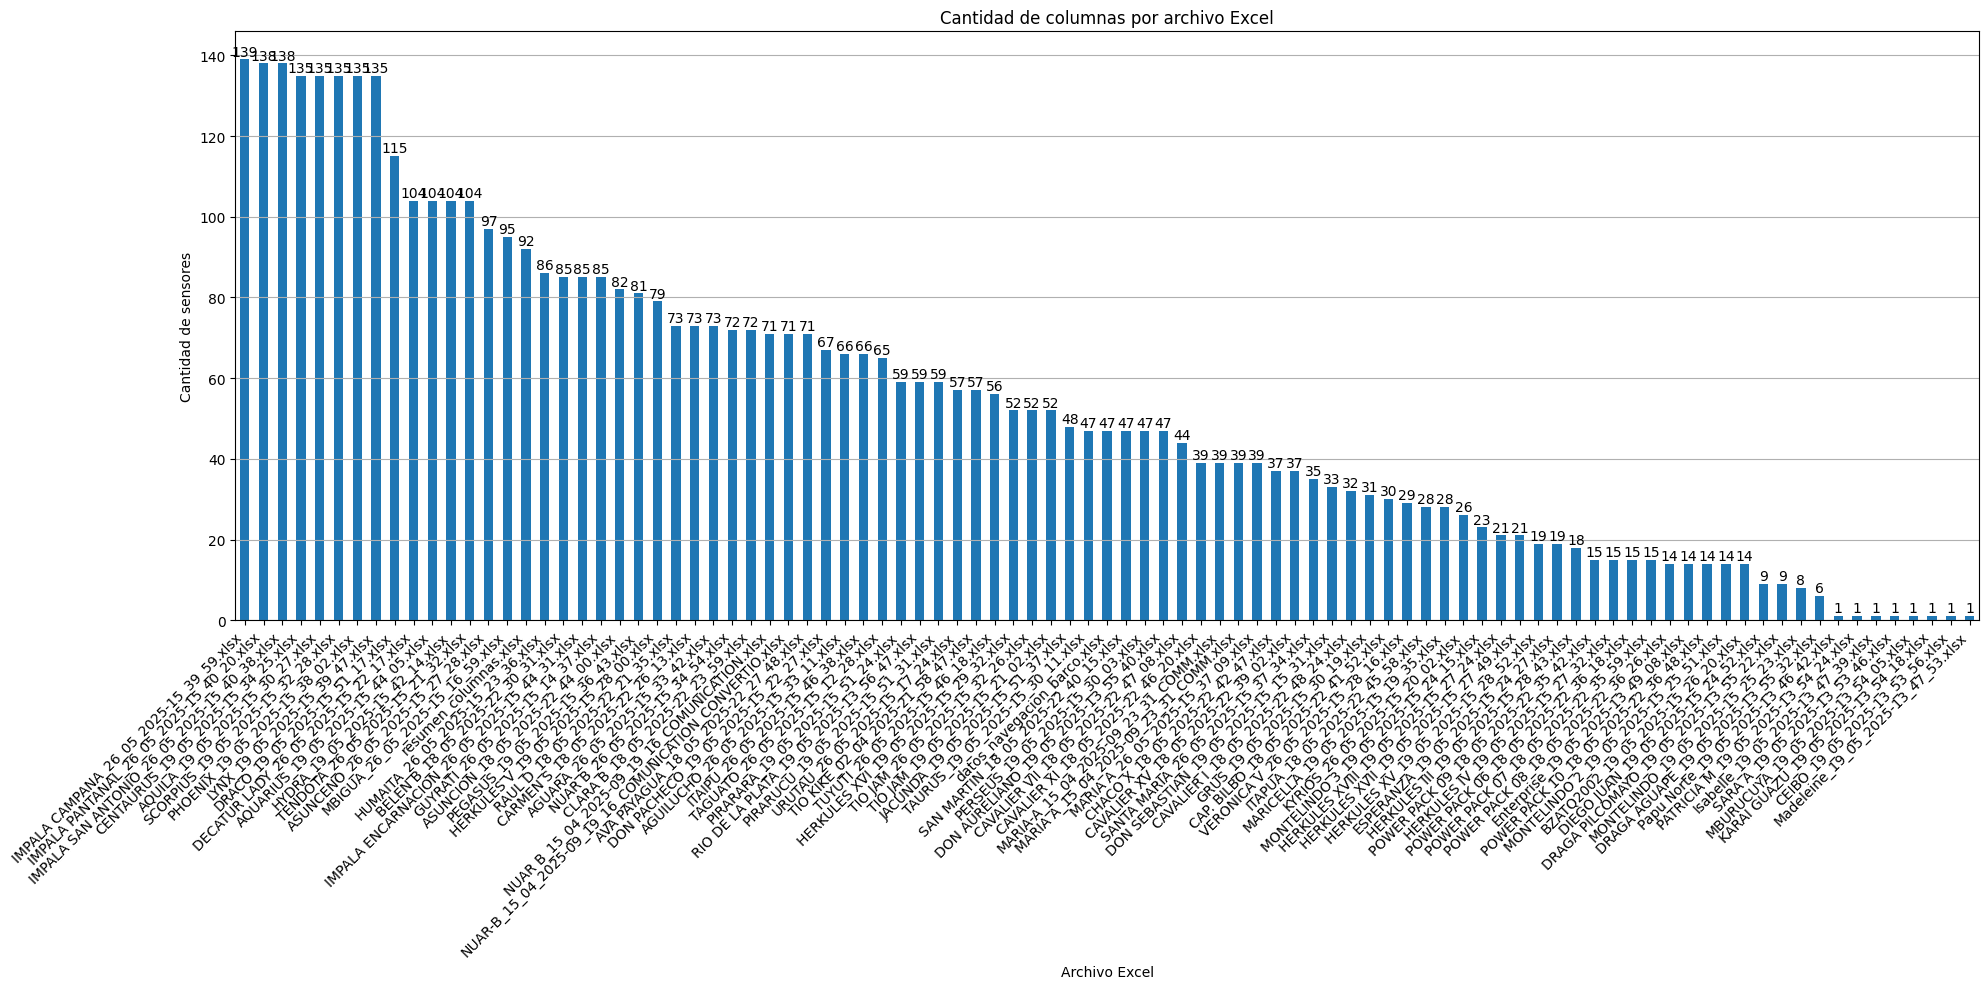

In [7]:
import matplotlib.pyplot as plt

# Contar cuántas columnas tiene cada archivo (omitimos los NaN)
column_counts = describe.notna().sum().sort_values(ascending=False)

# Graficar
plt.figure(figsize=(20, 10))
column_counts.plot(kind='bar')
plt.title("Cantidad de columnas por archivo Excel")
plt.xlabel("Archivo Excel")
plt.ylabel("Cantidad de sensores")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()

# Agregar etiquetas de valor sobre cada barra
for i, val in enumerate(column_counts):
    plt.text(i, val + 0.2, str(val), ha='center', va='bottom', fontsize=10)

# Guardar el gráfico como imagen PNG
plt.savefig("grafico_cantidad_columnas.png")
plt.show()

In [8]:
column_counts

IMPALA CAMPANA_26_05_2025-15_39_59.xlsx        139
IMPALA PANTANAL_26_05_2025-15_40_20.xlsx       138
IMPALA SAN ANTONIO_26_05_2025-15_40_38.xlsx    138
CENTAURUS_19_05_2025-15_34_25.xlsx             135
AQUILA_19_05_2025-15_30_27.xlsx                135
                                              ... 
SARA A_19_05_2025-13_53_46.xlsx                  1
MBURUCUYA_19_05_2025-13_54_05.xlsx               1
KARAI GUAZU_19_05_2025-13_54_18.xlsx             1
CEIBO_19_05_2025-13_53_56.xlsx                   1
Madeleine_19_05_2025-13_47_53.xlsx               1
Length: 93, dtype: int64